In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

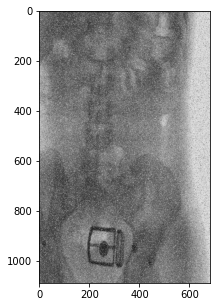

In [2]:
noisy_spine = cv.imread('./Noisy_Spine.png', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(5, 5))
plt.imshow(noisy_spine, cmap = 'gray', vmin = 0, vmax = 255);

## Section A

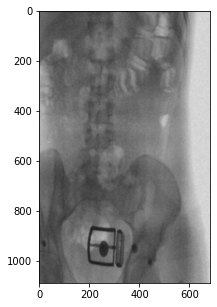

In [3]:
median_spine = cv.medianBlur(noisy_spine, 5)

plt.figure(figsize=(5, 5))
plt.imshow(median_spine, cmap = 'gray', vmin = 0, vmax = 255);

* this filter has removed the impulses

## Section B

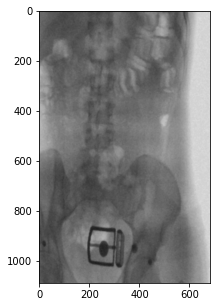

In [4]:
blurred_spine = cv.blur(median_spine, (3, 3))

plt.figure(figsize=(5, 5))
plt.imshow(blurred_spine, cmap = 'gray', vmin = 0, vmax = 255);

* this filter has removed the local guassian noises and smooth image

## Section C

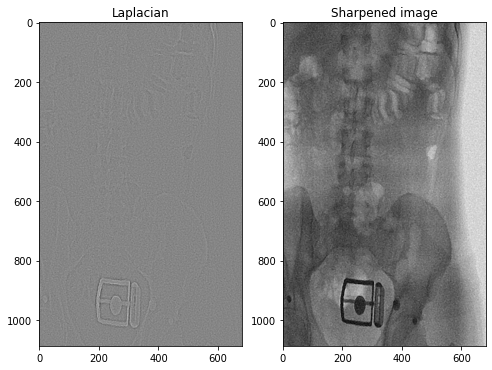

In [5]:
kernel = np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]])
laplacian_spine = cv.filter2D(blurred_spine, ddepth=cv.CV_64F, kernel=kernel)

c = -2
sharpened_spine = blurred_spine + c * laplacian_spine
sharpened_spine = np.where(sharpened_spine < 0, 0, sharpened_spine)
sharpened_spine = np.where(sharpened_spine > 255, 255, sharpened_spine)
sharpened_spine = sharpened_spine.astype(np.uint8)

laplacian_spine = (laplacian_spine - np.min(laplacian_spine)) / (np.max(laplacian_spine) - np.min(laplacian_spine)) * 255
laplacian_spine = laplacian_spine.astype(np.uint8)

fig, ax = plt.subplots(1, 2, figsize = (8, 8))

ax[0].imshow(laplacian_spine, cmap='gray', vmin = 0, vmax = 255)
ax[0].set_title('Laplacian')

ax[1].imshow(sharpened_spine, cmap='gray', vmin = 0, vmax = 255)
ax[1].set_title('Sharpened image');

## Section D

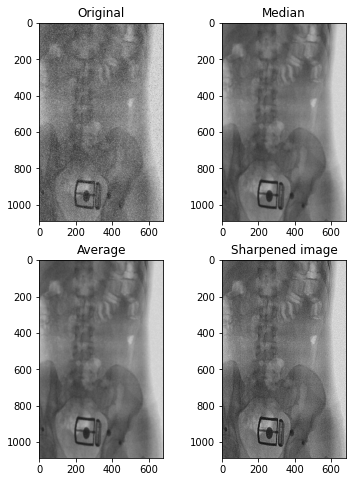

In [6]:
fig, ax = plt.subplots(2, 2, figsize = (6, 8))

ax[0,0].imshow(noisy_spine, cmap = 'gray', vmin = 0, vmax = 255)
ax[0,0].set_title('Original')

ax[0,1].imshow(median_spine, cmap = 'gray', vmin = 0, vmax = 255)
ax[0,1].set_title('Median')

ax[1,0].imshow(blurred_spine, cmap = 'gray', vmin = 0, vmax = 255)
ax[1,0].set_title('Average')

ax[1,1].imshow(sharpened_spine, cmap = 'gray', vmin = 0, vmax = 255)
ax[1,1].set_title('Sharpened image')

plt.show();

## Section H

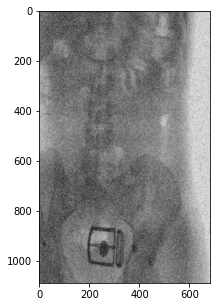

In [7]:
blurred_spine2 = cv.blur(noisy_spine, (3, 3))

plt.figure(figsize=(5, 5))
plt.imshow(blurred_spine2, cmap = 'gray', vmin = 0, vmax = 255);

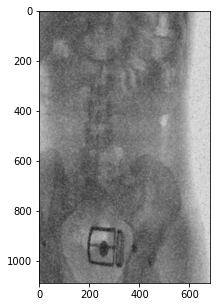

In [8]:
median_spine2 = cv.medianBlur(blurred_spine2, 5)

plt.figure(figsize=(5, 5))
plt.imshow(median_spine2, cmap = 'gray', vmin = 0, vmax = 255);

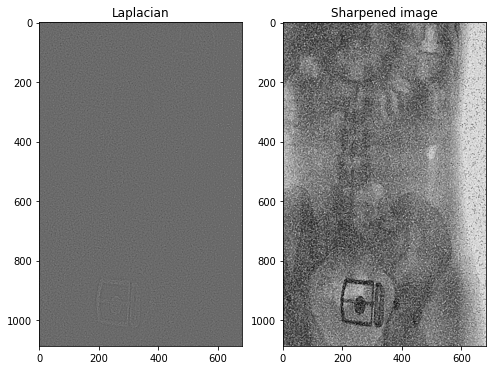

In [9]:
laplacian_spine2 = cv.filter2D(median_spine2, ddepth=cv.CV_64F, kernel=kernel)

sharpened_spine2 = median_spine2 + c * laplacian_spine2
sharpened_spine2 = np.where(sharpened_spine2 < 0, 0, sharpened_spine2)
sharpened_spine2 = np.where(sharpened_spine2 > 255, 255, sharpened_spine2)
sharpened_spine2 = sharpened_spine2.astype(np.uint8)

laplacian_spine2 = (laplacian_spine2 - np.min(laplacian_spine2)) / (np.max(laplacian_spine2) - np.min(laplacian_spine2)) * 255
laplacian_spine2 = laplacian_spine2.astype(np.uint8)

fig, ax = plt.subplots(1, 2, figsize = (8, 8))

ax[0].imshow(laplacian_spine2, cmap='gray', vmin = 0, vmax = 255)
ax[0].set_title('Laplacian')

ax[1].imshow(sharpened_spine2, cmap='gray', vmin = 0, vmax = 255)
ax[1].set_title('Sharpened image');

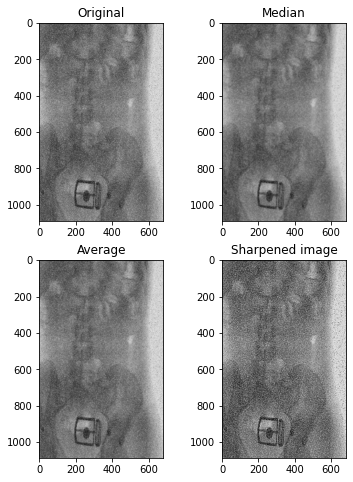

In [10]:
fig, ax = plt.subplots(2, 2, figsize = (6, 8))

ax[0,0].imshow(noisy_spine, cmap = 'gray', vmin = 0, vmax = 255)
ax[0,0].set_title('Original')

ax[0,1].imshow(median_spine2, cmap = 'gray', vmin = 0, vmax = 255)
ax[0,1].set_title('Median')

ax[1,0].imshow(blurred_spine2, cmap = 'gray', vmin = 0, vmax = 255)
ax[1,0].set_title('Average')

ax[1,1].imshow(sharpened_spine2, cmap = 'gray', vmin = 0, vmax = 255)
ax[1,1].set_title('Sharpened image')

plt.show();

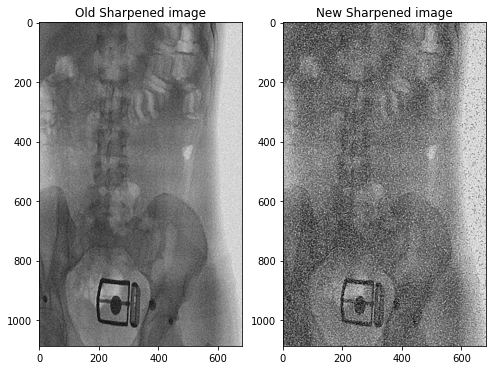

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (8, 8))

ax[0].imshow(sharpened_spine, cmap='gray', vmin = 0, vmax = 255)
ax[0].set_title('Old Sharpened image')

ax[1].imshow(sharpened_spine2, cmap='gray', vmin = 0, vmax = 255)
ax[1].set_title('New Sharpened image');

* there are diffrences
    * the mean filter cant remove salts and papers and even worse it develops them
    * the median filter after the mean filter can properly remove salts and papers so it is useless